## Iris Flowers Classification ML Project

### Tasks:
    1. Load the dataset
    2. data preprocessing
    3. Exploratory Data Analysis
    4. Data Visualization
    5. Build Logistic Regression Model
    6. Check for Accuracy

### import needed libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport

### Load the iris Dataset

In [2]:
df = pd.read_csv('/home/raj/Internship/iris.csv')

In [3]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Pre-processing
    1. Check null values
    2. Check for duplicates
    3. Datatypes

In [4]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

#### no null values in the dataset

In [7]:
df.duplicated().sum()

3

In [5]:
df[df.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


#### 3 duplicates present, but not an issue as flowers can have same features

In [6]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

#### class is categorical data, need to be handled before model training

### Exploratory Data Analysis And Visualization


In [7]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# stats of the dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

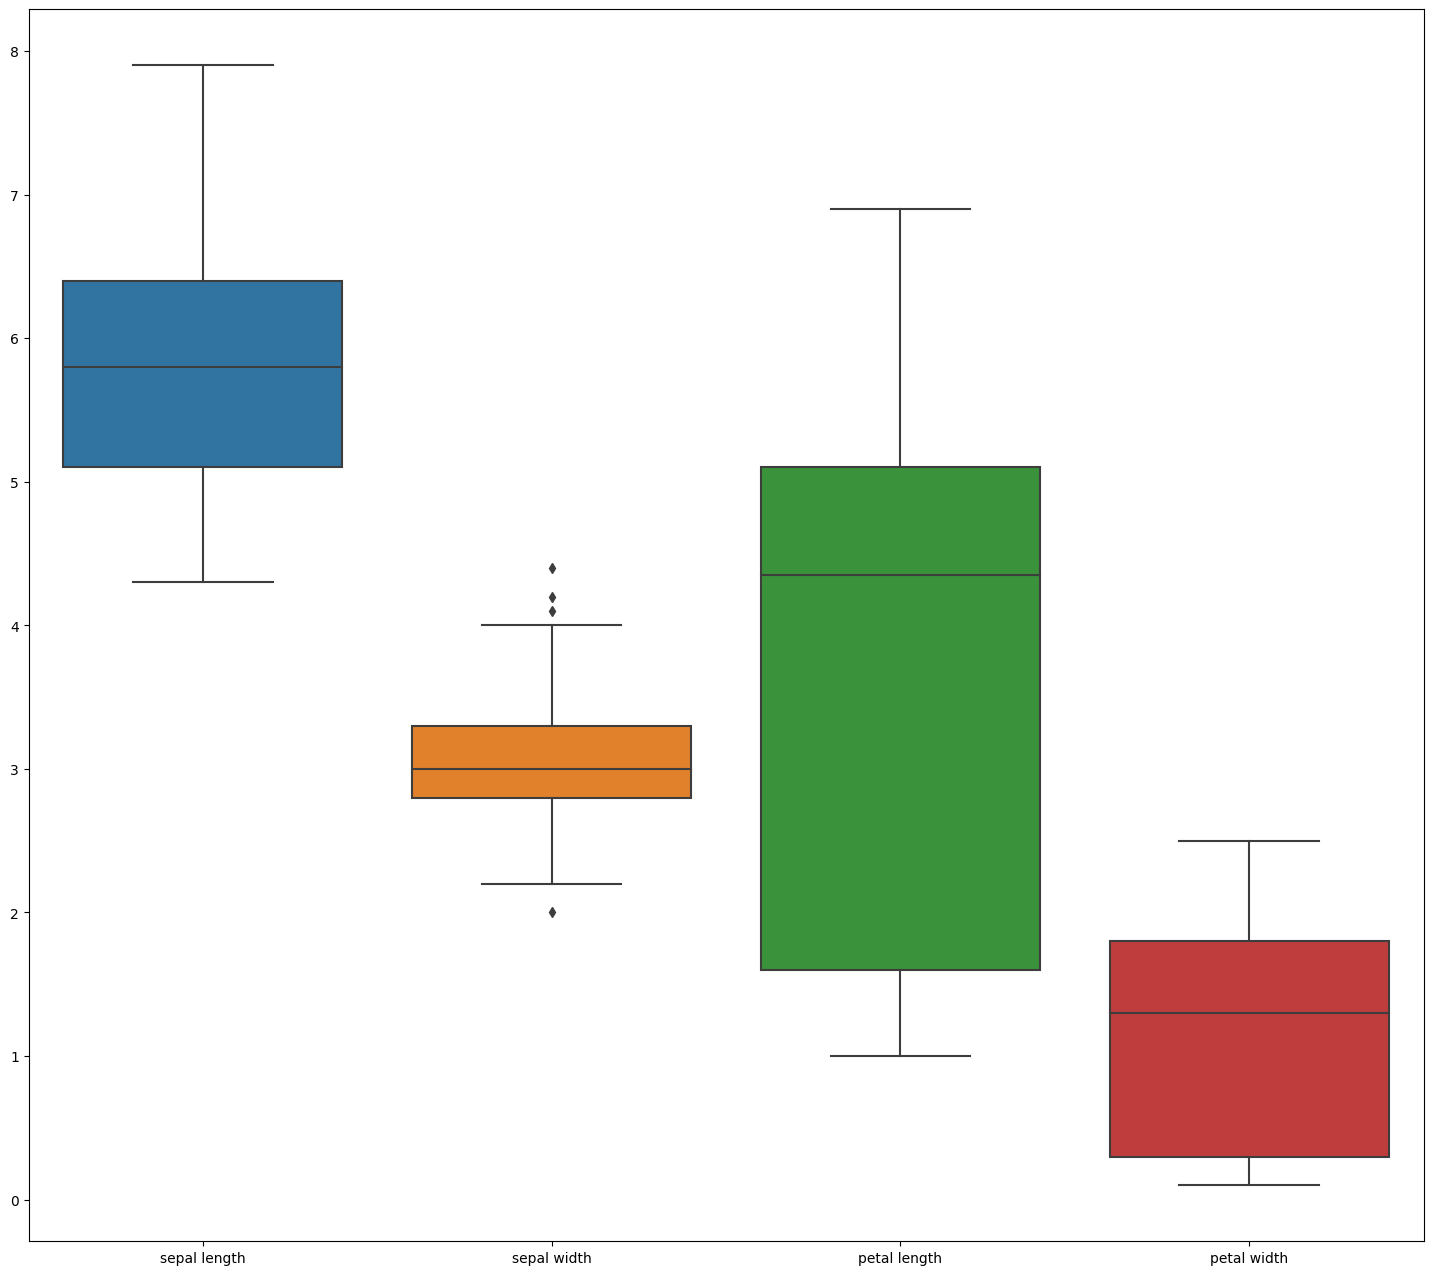

In [13]:
fig,ax = plt.subplots(figsize=(18,16))
sns.boxplot(data=df,ax=ax)

### Split into independent and dependet features

In [14]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [17]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
y = df['class']

In [19]:
x = df.drop(columns=['class'])

In [21]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<AxesSubplot:>

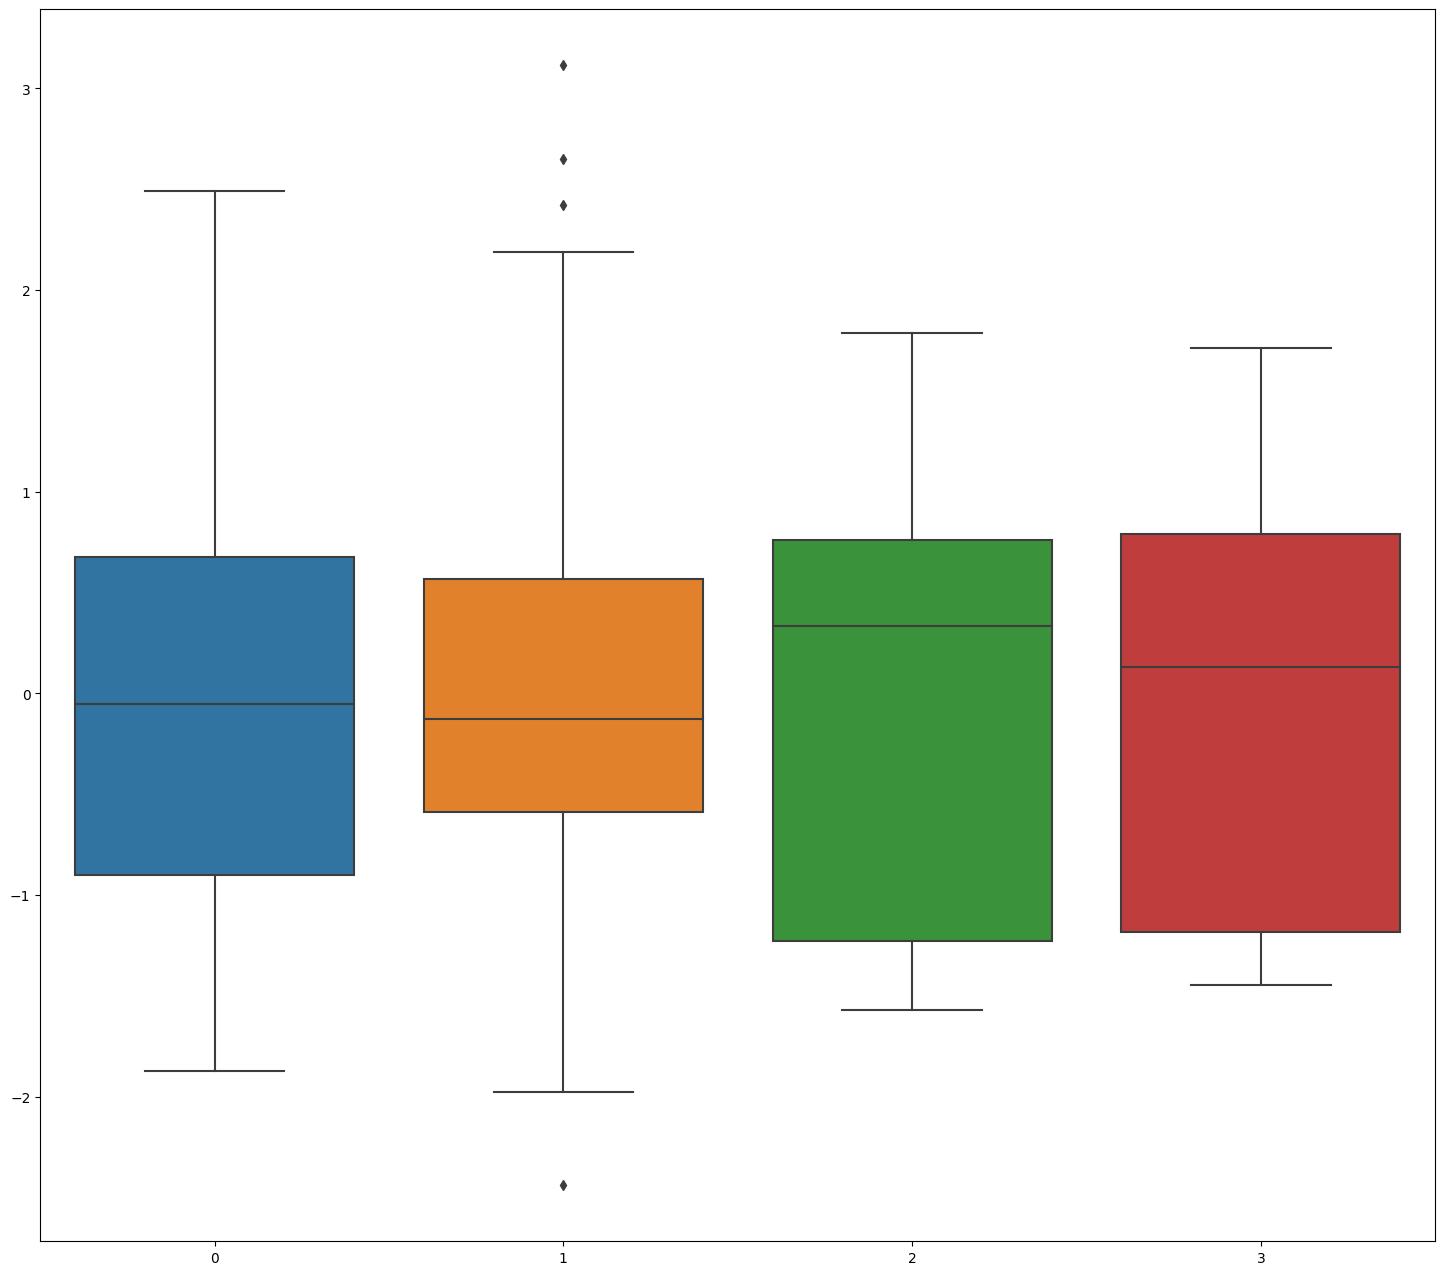

In [31]:
fig,ax = plt.subplots(figsize=(18,16))
sns.boxplot(data = pd.DataFrame(x_scaled),ax=ax)

### Split data into train and test

In [25]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [26]:
def vif_score(data):
    scaler = StandardScaler()
    arr = scaler.fit_transform(data)
    return pd.DataFrame([[data.columns[i],variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns=['Feature','vif-score'])
    

In [29]:
vif_score(x)

,Feature,vif-score
0,sepal length,7.103113
1,sepal width,2.099039
2,petal length,31.397292
3,petal width,16.141564


#### petal length and petal width are highly corelated

### Creating Logistic Regression Model

In [32]:
def model():
    solver = ['newton-cg', 'sag', 'saga','lbfgs']
    score = {}
    for i in solver:
        logr = LogisticRegression(solver=i)
        model = logr.fit(X_train,y_train)
        pred = model.predict(X_test)
        sco = model.score(X_test,y_test)
        score[i] = sco
    return score
        

In [36]:
model()

{'newton-cg': 1.0, 'sag': 1.0, 'saga': 1.0, 'lbfgs': 1.0}

In [37]:
logr = LogisticRegression(solver='saga')

In [40]:
model = logr.fit(X_train,y_train)

In [41]:
pred = model.predict(X_test)

In [42]:
accuracy_score(y_test,pred)

1.0